<a href="https://colab.research.google.com/github/tanisha0016/Topsis-for-pretrained-text-summarization-models/blob/main/Topsis_for_pretrained_text_summarization_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Model  TOPSIS Score  Rank
1       T5      0.715203     1
4    XLNet      0.570910     2
0     BART      0.455165     3
3  PEGASUS      0.413394     4
2  GPT-3.5      0.384168     5


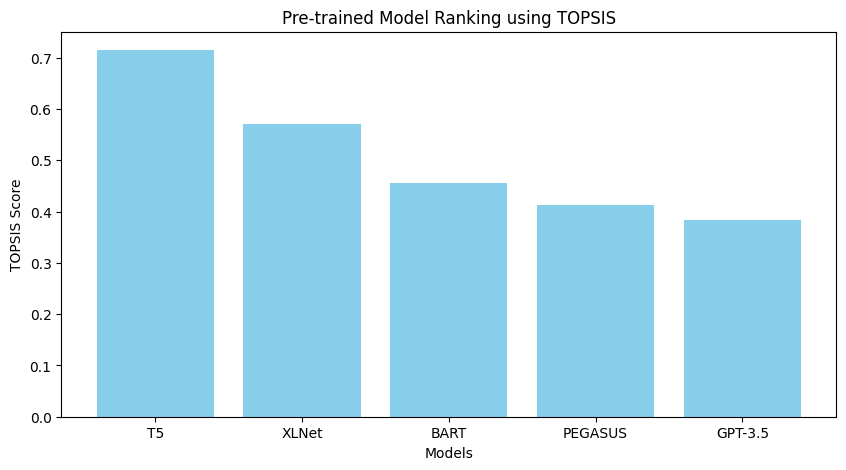

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

models = ["BART", "T5", "GPT-3.5", "PEGASUS", "XLNet"]
criteria = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "Inference Time", "Memory Usage"]

decision_matrix = np.array([
    [45.6, 22.3, 41.2, 1.5, 800],   # BART
    [47.1, 23.5, 42.8, 1.2, 700],   # T5
    [50.3, 25.8, 44.5, 2.0, 900],   # GPT-3.5
    [48.2, 24.1, 43.1, 1.7, 850],   # PEGASUS
    [46.8, 22.9, 42.0, 1.4, 780]    # XLNet
])
weights = np.array([0.3, 0.25, 0.2, 0.15, 0.1])

criteria_type = ["+", "+", "+", "-", "-"]

norm_matrix = decision_matrix / np.sqrt((decision_matrix ** 2).sum(axis=0))

weighted_matrix = norm_matrix * weights

ideal_best = np.max(weighted_matrix, axis=0) * (np.array(criteria_type) == "+") + np.min(weighted_matrix, axis=0) * (np.array(criteria_type) == "-")
ideal_worst = np.min(weighted_matrix, axis=0) * (np.array(criteria_type) == "+") + np.max(weighted_matrix, axis=0) * (np.array(criteria_type) == "-")

distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

scores = distance_worst / (distance_best + distance_worst)

ranking = np.argsort(scores)[::-1]
ranked_models = [models[i] for i in ranking]

results_df = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": scores,
    "Rank": [list(ranking).index(i) + 1 for i in range(len(models))]
}).sort_values(by="Rank")

print(results_df)

plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["TOPSIS Score"], color='skyblue')
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.title("Pre-trained Model Ranking using TOPSIS")
plt.show()